# BÀI TẬP THỰC HÀNH: PHÂN TÍCH KHÁM PHÁ DỮ LIỆU
## Tập dữ liệu: Online Retail (Mua sắm tại siêu thị)

---

## Mục tiêu
Thực hiện phân tích khám phá dữ liệu (EDA) đầy đủ trên tập dữ liệu giao dịch mua sắm trực tuyến, bao gồm:
- Thống kê mô tả
- Xử lý và làm sạch dữ liệu
- Trực quan hóa dữ liệu
- Phân tích đơn biến và hai biến
- Phân tích theo thời gian
- Phân tích khách hàng và sản phẩm

---

## Giới thiệu về tập dữ liệu
Tập dữ liệu Online Retail chứa các giao dịch mua sắm của một cửa hàng bán lẻ trực tuyến có trụ sở tại Anh, hoạt động từ 01/12/2010 đến 09/12/2011.

**Các cột dữ liệu:**
- `InvoiceNo`: Mã hóa đơn (6 ký tự, nếu bắt đầu bằng 'C' là hóa đơn hủy)
- `StockCode`: Mã sản phẩm (5 ký tự)
- `Description`: Mô tả sản phẩm
- `Quantity`: Số lượng sản phẩm trong mỗi giao dịch
- `InvoiceDate`: Ngày và giờ giao dịch
- `UnitPrice`: Giá đơn vị (đơn vị: Bảng Anh)
- `CustomerID`: Mã khách hàng (5 ký tự)
- `Country`: Quốc gia của khách hàng

## 1. IMPORT THƯ VIỆN VÀ NẠP DỮ LIỆU

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Đã import thư viện thành công!")

✓ Đã import thư viện thành công!


In [2]:
# Nạp dữ liệu
# Link: https://www.kaggle.com/datasets/vijayuv/onlineretail

try:
    retail_data = pd.read_csv('onlineretail.csv')
    print("✓ Đã nạp dữ liệu từ file Excel thành công!")
except:
    # Nếu không có file, tạo dữ liệu mẫu để demo
    print("⚠ Không tìm thấy file dữ liệu. Tạo dữ liệu mẫu để demo...")
    np.random.seed(42)
    n_samples = 10000
    
    retail_data = pd.DataFrame({
        'InvoiceNo': [f'{i:06d}' for i in np.random.randint(536365, 581587, n_samples)],
        'StockCode': [f'{i:05d}' for i in np.random.randint(10000, 99999, n_samples)],
        'Description': np.random.choice(['WHITE HANGING HEART T-LIGHT HOLDER', 
                                        'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER',
                                        'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE'],
                                       n_samples),
        'Quantity': np.random.randint(-10, 50, n_samples),
        'InvoiceDate': pd.date_range('2010-12-01', '2011-12-09', periods=n_samples),
        'UnitPrice': np.abs(np.random.normal(3, 2, n_samples)),
        'CustomerID': np.random.choice([12346, 12347, 12348, np.nan], n_samples, p=[0.3, 0.3, 0.3, 0.1]),
        'Country': np.random.choice(['United Kingdom', 'France', 'Germany', 'Spain'], 
                                   n_samples, p=[0.7, 0.1, 0.1, 0.1])
    })
    print("✓ Đã tạo dữ liệu mẫu!")

print(f"\nKích thước dữ liệu: {retail_data.shape[0]} dòng, {retail_data.shape[1]} cột")

✓ Đã nạp dữ liệu từ file Excel thành công!

Kích thước dữ liệu: 541909 dòng, 8 cột


## 2. KHÁM PHÁ DỮ LIỆU BAN ĐẦU

In [3]:
# Xem 5 dòng đầu tiên
print("=" * 80)
print("5 DÒNG ĐẦU TIÊN CỦA DỮ LIỆU")
print("=" * 80)
retail_data.head()

5 DÒNG ĐẦU TIÊN CỦA DỮ LIỆU


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Thông tin tổng quan về dữ liệu
print("=" * 80)
print("THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU")
print("=" * 80)
retail_data.info()

THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Kiểm tra kiểu dữ liệu
print("=" * 80)
print("KIỂU DỮ LIỆU CỦA CÁC CỘT")
print("=" * 80)
print(retail_data.dtypes)
print("\n" + "=" * 80)

KIỂU DỮ LIỆU CỦA CÁC CỘT
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object



In [6]:
# Kiểm tra giá trị thiếu
print("=" * 80)
print("KIỂM TRA GIÁ TRỊ THIẾU")
print("=" * 80)
missing_values = retail_data.isnull().sum()
missing_percent = (missing_values / len(retail_data)) * 100
missing_df = pd.DataFrame({
    'Số lượng thiếu': missing_values,
    'Phần trăm (%)': missing_percent
})
print(missing_df[missing_df['Số lượng thiếu'] > 0])
print("\n" + "=" * 80)

KIỂM TRA GIÁ TRỊ THIẾU
             Số lượng thiếu  Phần trăm (%)
Description            1454       0.268311
CustomerID           135080      24.926694



In [7]:
# Kiểm tra dữ liệu trùng lặp
print("=" * 80)
print("KIỂM TRA DỮ LIỆU TRÙNG LẶP")
print("=" * 80)
duplicates = retail_data.duplicated().sum()
print(f"Số dòng trùng lặp: {duplicates}")
print(f"Phần trăm trùng lặp: {(duplicates/len(retail_data)*100):.2f}%")
print("\n" + "=" * 80)

KIỂM TRA DỮ LIỆU TRÙNG LẶP
Số dòng trùng lặp: 5268
Phần trăm trùng lặp: 0.97%



## 3. THỐNG KÊ MÔ TẢ

In [8]:
# Thống kê mô tả cho các biến số
print("=" * 80)
print("THỐNG KÊ MÔ TẢ CHO CÁC BIẾN SỐ")
print("=" * 80)
retail_data.describe()

THỐNG KÊ MÔ TẢ CHO CÁC BIẾN SỐ


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Thống kê chi tiết cho từng biến số
print("=" * 80)
print("THỐNG KÊ CHI TIẾT CHO BIẾN QUANTITY (SỐ LƯỢNG)")
print("=" * 80)
print(f"Mean (Trung bình): {retail_data['Quantity'].mean():.2f}")
print(f"Median (Trung vị): {retail_data['Quantity'].median():.2f}")
print(f"Mode (Yếu vị): {retail_data['Quantity'].mode().values[0] if len(retail_data['Quantity'].mode()) > 0 else 'N/A'}")
print(f"Std Dev (Độ lệch chuẩn): {retail_data['Quantity'].std():.2f}")
print(f"Variance (Phương sai): {retail_data['Quantity'].var():.2f}")
print(f"Min (Giá trị nhỏ nhất): {retail_data['Quantity'].min():.2f}")
print(f"Max (Giá trị lớn nhất): {retail_data['Quantity'].max():.2f}")
print(f"Range (Phạm vi): {retail_data['Quantity'].max() - retail_data['Quantity'].min():.2f}")
print(f"Q1 (25%): {retail_data['Quantity'].quantile(0.25):.2f}")
print(f"Q2 (50%): {retail_data['Quantity'].quantile(0.50):.2f}")
print(f"Q3 (75%): {retail_data['Quantity'].quantile(0.75):.2f}")
print(f"IQR: {retail_data['Quantity'].quantile(0.75) - retail_data['Quantity'].quantile(0.25):.2f}")
print(f"Skewness (Độ lệch): {retail_data['Quantity'].skew():.2f}")
print(f"Kurtosis (Độ nhọn): {retail_data['Quantity'].kurtosis():.2f}")

print("\n" + "=" * 80)
print("THỐNG KÊ CHI TIẾT CHO BIẾN UNITPRICE (GIÁ ĐƠN VỊ)")
print("=" * 80)
print(f"Mean (Trung bình): {retail_data['UnitPrice'].mean():.2f}")
print(f"Median (Trung vị): {retail_data['UnitPrice'].median():.2f}")
print(f"Mode (Yếu vị): {retail_data['UnitPrice'].mode().values[0] if len(retail_data['UnitPrice'].mode()) > 0 else 'N/A'}")
print(f"Std Dev (Độ lệch chuẩn): {retail_data['UnitPrice'].std():.2f}")
print(f"Min (Giá trị nhỏ nhất): {retail_data['UnitPrice'].min():.2f}")
print(f"Max (Giá trị lớn nhất): {retail_data['UnitPrice'].max():.2f}")
print(f"IQR: {retail_data['UnitPrice'].quantile(0.75) - retail_data['UnitPrice'].quantile(0.25):.2f}")

THỐNG KÊ CHI TIẾT CHO BIẾN QUANTITY (SỐ LƯỢNG)
Mean (Trung bình): 9.55
Median (Trung vị): 3.00
Mode (Yếu vị): 1
Std Dev (Độ lệch chuẩn): 218.08
Variance (Phương sai): 47559.39
Min (Giá trị nhỏ nhất): -80995.00
Max (Giá trị lớn nhất): 80995.00
Range (Phạm vi): 161990.00
Q1 (25%): 1.00
Q2 (50%): 3.00
Q3 (75%): 10.00
IQR: 9.00
Skewness (Độ lệch): -0.26
Kurtosis (Độ nhọn): 119769.16

THỐNG KÊ CHI TIẾT CHO BIẾN UNITPRICE (GIÁ ĐƠN VỊ)
Mean (Trung bình): 4.61
Median (Trung vị): 2.08
Mode (Yếu vị): 1.25
Std Dev (Độ lệch chuẩn): 96.76
Min (Giá trị nhỏ nhất): -11062.06
Max (Giá trị lớn nhất): 38970.00
IQR: 2.88


In [10]:
# Thống kê cho các biến phân loại
print("=" * 80)
print("THỐNG KÊ CHO CÁC BIẾN PHÂN LOẠI")
print("=" * 80)
print(f"\nSố lượng hóa đơn duy nhất: {retail_data['InvoiceNo'].nunique()}")
print(f"Số lượng sản phẩm duy nhất: {retail_data['StockCode'].nunique()}")
print(f"Số lượng khách hàng duy nhất: {retail_data['CustomerID'].nunique()}")
print(f"Số lượng quốc gia: {retail_data['Country'].nunique()}")

print("\n" + "=" * 80)
print("TOP 10 QUỐC GIA CÓ NHIỀU GIAO DỊCH NHẤT")
print("=" * 80)
print(retail_data['Country'].value_counts().head(10))

THỐNG KÊ CHO CÁC BIẾN PHÂN LOẠI

Số lượng hóa đơn duy nhất: 25900
Số lượng sản phẩm duy nhất: 4070
Số lượng khách hàng duy nhất: 4372
Số lượng quốc gia: 38

TOP 10 QUỐC GIA CÓ NHIỀU GIAO DỊCH NHẤT
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64


## 4. XỬ LÝ VÀ LÀM SẠCH DỮ LIỆU

In [11]:
# Tạo bản sao để xử lý
retail_clean = retail_data.copy()

print("=" * 80)
print("XỬ LÝ DỮ LIỆU")
print("=" * 80)
print(f"Kích thước ban đầu: {retail_clean.shape}")

# 1. Loại bỏ các dòng có Description thiếu
retail_clean = retail_clean.dropna(subset=['Description'])
print(f"Sau khi loại bỏ Description thiếu: {retail_clean.shape}")

# 2. Loại bỏ các giao dịch có Quantity <= 0 (trả hàng hoặc lỗi)
retail_clean = retail_clean[retail_clean['Quantity'] > 0]
print(f"Sau khi loại bỏ Quantity <= 0: {retail_clean.shape}")

# 3. Loại bỏ các giao dịch có UnitPrice <= 0
retail_clean = retail_clean[retail_clean['UnitPrice'] > 0]
print(f"Sau khi loại bỏ UnitPrice <= 0: {retail_clean.shape}")

# 4. Tạo cột TotalPrice (Tổng giá trị giao dịch)
retail_clean['TotalPrice'] = retail_clean['Quantity'] * retail_clean['UnitPrice']
print(f"\n✓ Đã tạo cột TotalPrice")

# 5. Chuyển đổi InvoiceDate sang datetime nếu chưa
if retail_clean['InvoiceDate'].dtype != 'datetime64[ns]':
    retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])
    print(f"✓ Đã chuyển đổi InvoiceDate sang datetime")

# 6. Tạo các cột thời gian bổ sung
retail_clean['Year'] = retail_clean['InvoiceDate'].dt.year
retail_clean['Month'] = retail_clean['InvoiceDate'].dt.month
retail_clean['Day'] = retail_clean['InvoiceDate'].dt.day
retail_clean['DayOfWeek'] = retail_clean['InvoiceDate'].dt.dayofweek
retail_clean['Hour'] = retail_clean['InvoiceDate'].dt.hour
print(f"✓ Đã tạo các cột thời gian bổ sung")

print(f"\nKích thước cuối cùng: {retail_clean.shape}")
print("=" * 80)

XỬ LÝ DỮ LIỆU
Kích thước ban đầu: (541909, 8)
Sau khi loại bỏ Description thiếu: (540455, 8)
Sau khi loại bỏ Quantity <= 0: (530693, 8)
Sau khi loại bỏ UnitPrice <= 0: (530104, 8)

✓ Đã tạo cột TotalPrice
✓ Đã chuyển đổi InvoiceDate sang datetime
✓ Đã tạo các cột thời gian bổ sung

Kích thước cuối cùng: (530104, 14)


In [12]:
# Xử lý outliers bằng phương pháp IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=" * 80)
print("PHÁT HIỆN OUTLIERS")
print("=" * 80)

# Phát hiện outliers cho Quantity
outliers_qty, lower_qty, upper_qty = detect_outliers_iqr(retail_clean, 'Quantity')
print(f"\nQuantity:")
print(f"  Lower bound: {lower_qty:.2f}")
print(f"  Upper bound: {upper_qty:.2f}")
print(f"  Số outliers: {len(outliers_qty)} ({len(outliers_qty)/len(retail_clean)*100:.2f}%)")

# Phát hiện outliers cho UnitPrice
outliers_price, lower_price, upper_price = detect_outliers_iqr(retail_clean, 'UnitPrice')
print(f"\nUnitPrice:")
print(f"  Lower bound: {lower_price:.2f}")
print(f"  Upper bound: {upper_price:.2f}")
print(f"  Số outliers: {len(outliers_price)} ({len(outliers_price)/len(retail_clean)*100:.2f}%)")

# Phát hiện outliers cho TotalPrice
outliers_total, lower_total, upper_total = detect_outliers_iqr(retail_clean, 'TotalPrice')
print(f"\nTotalPrice:")
print(f"  Lower bound: {lower_total:.2f}")
print(f"  Upper bound: {upper_total:.2f}")
print(f"  Số outliers: {len(outliers_total)} ({len(outliers_total)/len(retail_clean)*100:.2f}%)")

print("\n" + "=" * 80)

PHÁT HIỆN OUTLIERS

Quantity:
  Lower bound: -12.50
  Upper bound: 23.50
  Số outliers: 56363 (10.63%)

UnitPrice:
  Lower bound: -3.07
  Upper bound: 8.45
  Số outliers: 37999 (7.17%)

TotalPrice:
  Lower bound: -17.18
  Upper bound: 38.63
  Số outliers: 42651 (8.05%)



## 5. PHÂN TÍCH ĐƠN BIẾN (UNIVARIATE ANALYSIS)

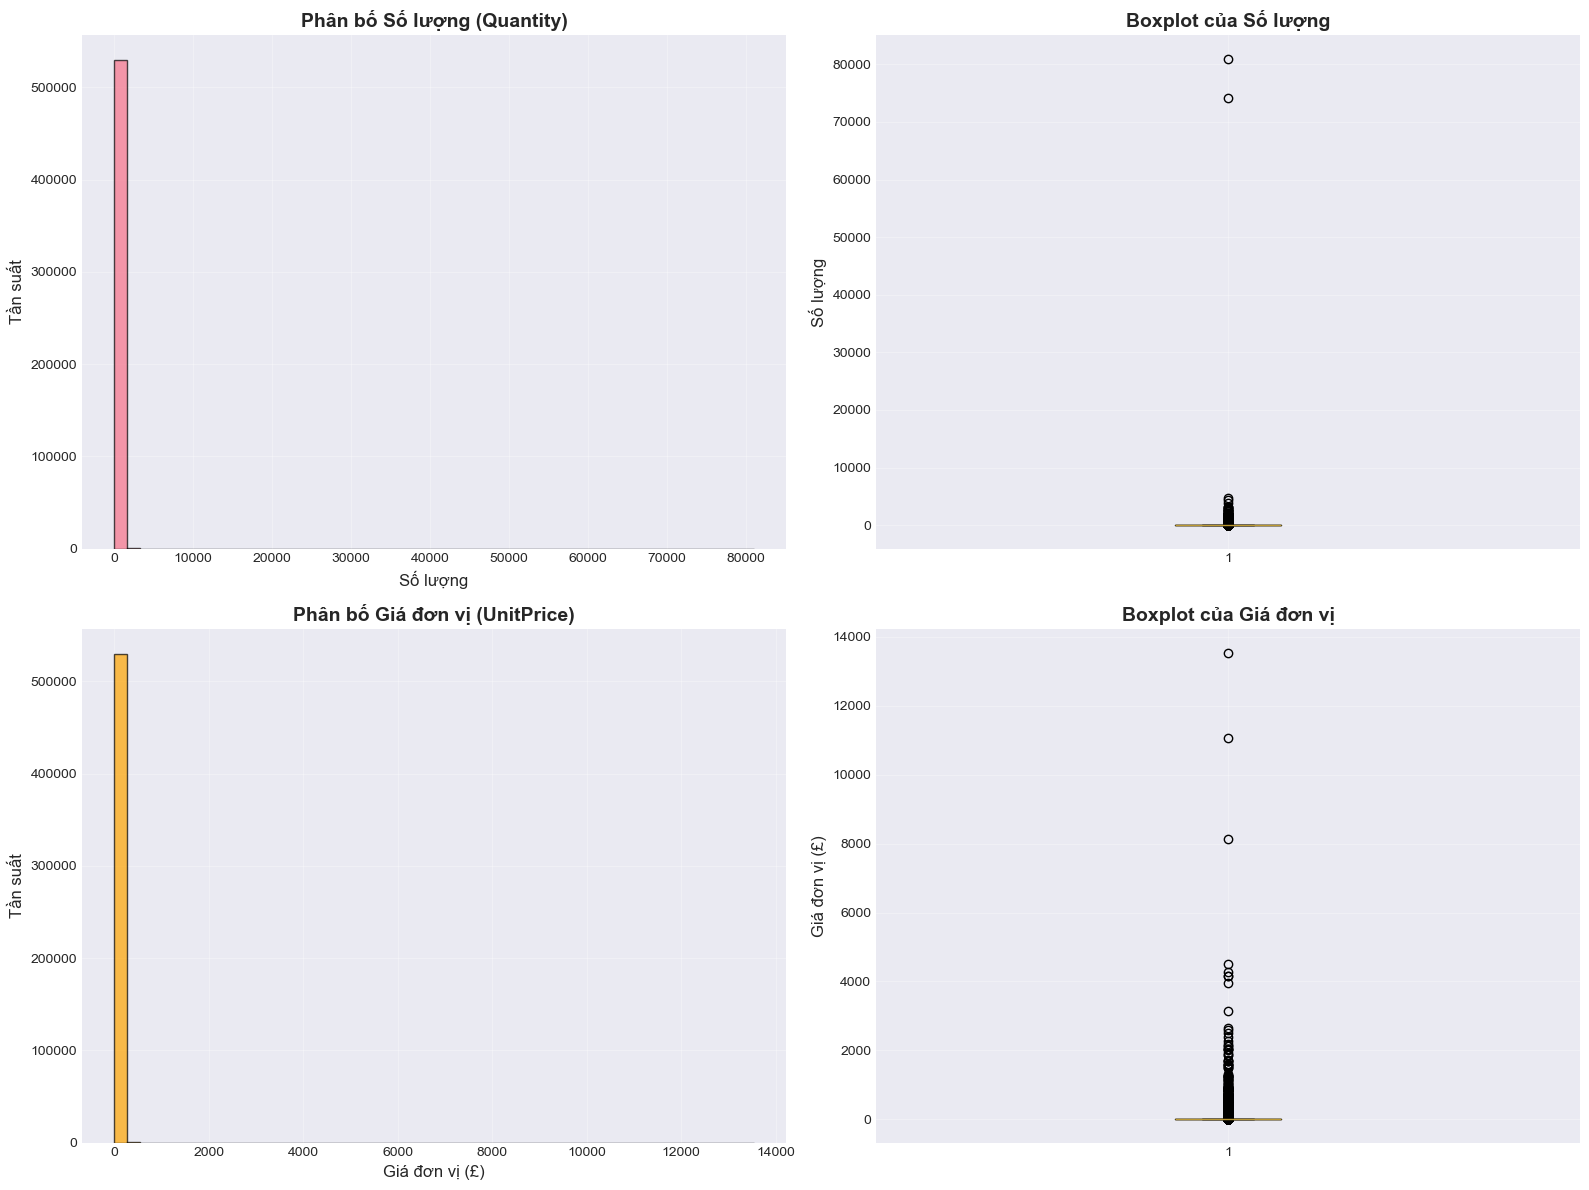

In [13]:
# Phân tích phân bố của Quantity
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(retail_clean['Quantity'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Phân bố Số lượng (Quantity)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Số lượng', fontsize=12)
axes[0, 0].set_ylabel('Tần suất', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Boxplot
axes[0, 1].boxplot(retail_clean['Quantity'], vert=True)
axes[0, 1].set_title('Boxplot của Số lượng', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Số lượng', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Histogram cho UnitPrice
axes[1, 0].hist(retail_clean['UnitPrice'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_title('Phân bố Giá đơn vị (UnitPrice)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Giá đơn vị (£)', fontsize=12)
axes[1, 0].set_ylabel('Tần suất', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# Boxplot cho UnitPrice
axes[1, 1].boxplot(retail_clean['UnitPrice'], vert=True)
axes[1, 1].set_title('Boxplot của Giá đơn vị', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Giá đơn vị (£)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



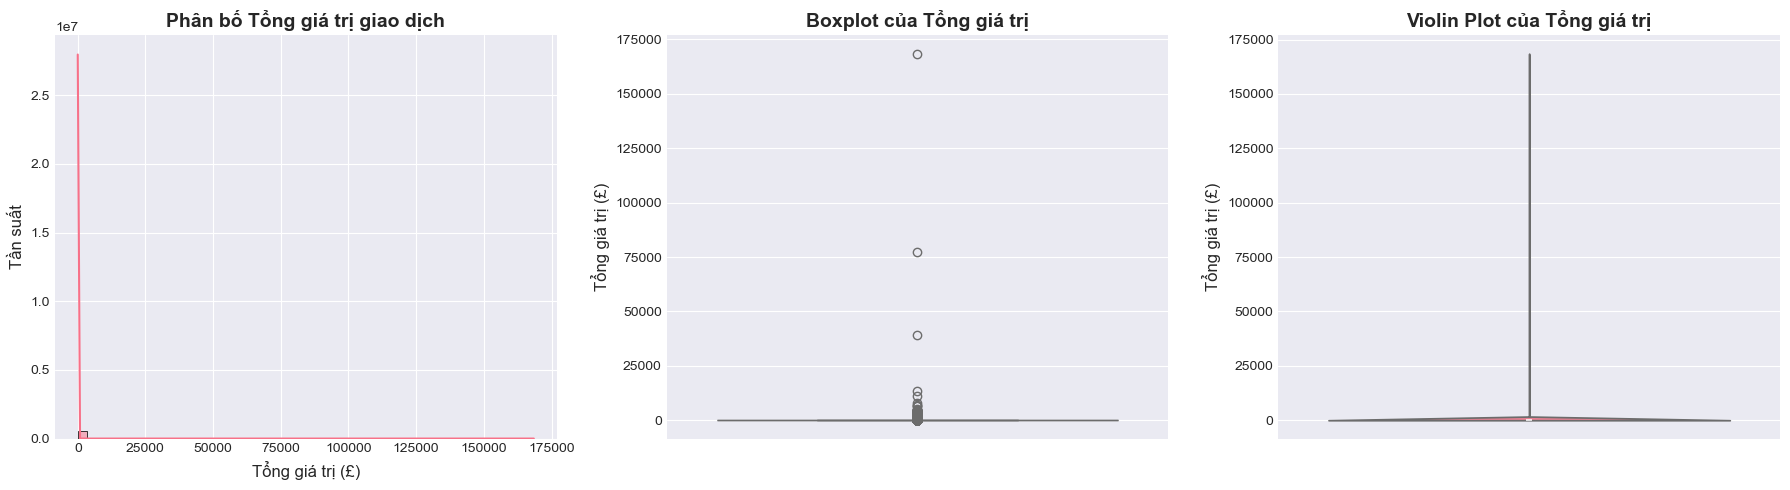

In [14]:
# Phân tích TotalPrice với Seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
sns.histplot(data=retail_clean, x='TotalPrice', bins=50, kde=True, ax=axes[0])
axes[0].set_title('Phân bố Tổng giá trị giao dịch', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tổng giá trị (£)', fontsize=12)
axes[0].set_ylabel('Tần suất', fontsize=12)

# Boxplot
sns.boxplot(data=retail_clean, y='TotalPrice', ax=axes[1])
axes[1].set_title('Boxplot của Tổng giá trị', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Tổng giá trị (£)', fontsize=12)

# Violin plot
sns.violinplot(data=retail_clean, y='TotalPrice', ax=axes[2])
axes[2].set_title('Violin Plot của Tổng giá trị', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Tổng giá trị (£)', fontsize=12)

plt.tight_layout()
plt.show()



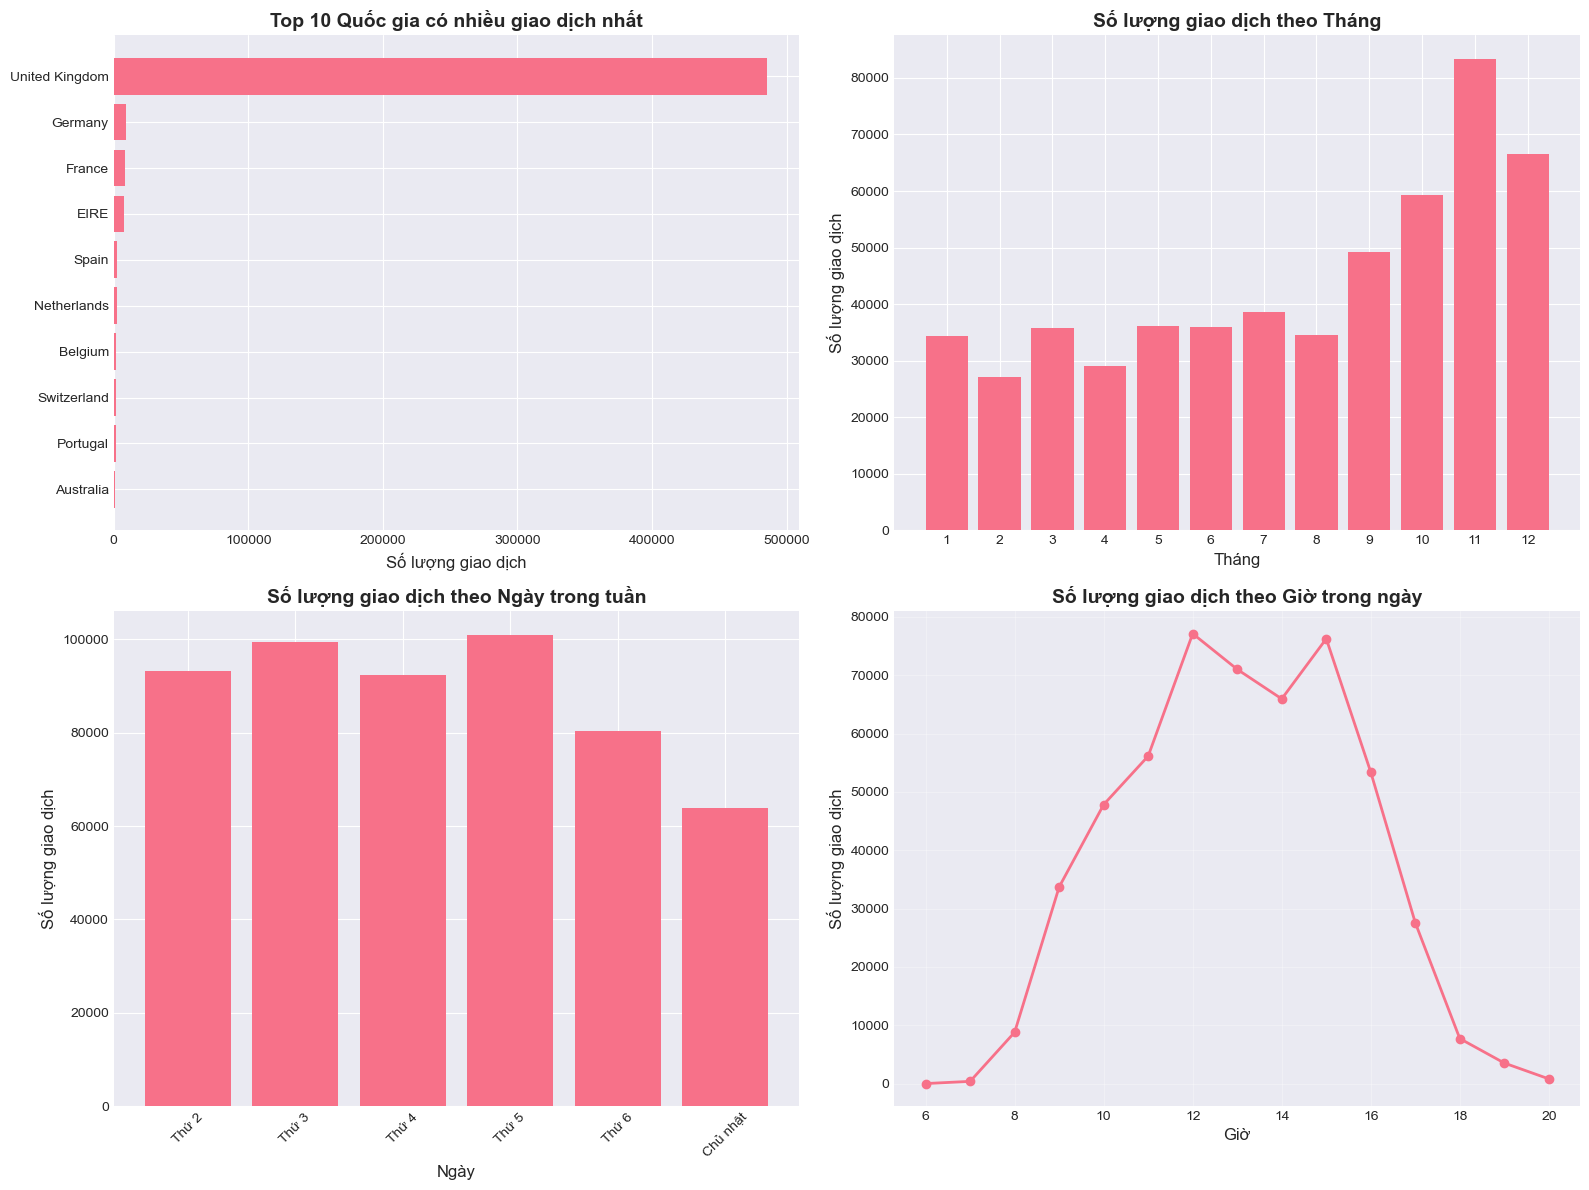

In [15]:
# Phân tích các biến phân loại
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 10 quốc gia
top_countries = retail_clean['Country'].value_counts().head(10)
axes[0, 0].barh(top_countries.index, top_countries.values)
axes[0, 0].set_title('Top 10 Quốc gia có nhiều giao dịch nhất', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Số lượng giao dịch', fontsize=12)
axes[0, 0].invert_yaxis()

# Phân bố theo tháng
month_counts = retail_clean['Month'].value_counts().sort_index()
axes[0, 1].bar(month_counts.index, month_counts.values)
axes[0, 1].set_title('Số lượng giao dịch theo Tháng', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Tháng', fontsize=12)
axes[0, 1].set_ylabel('Số lượng giao dịch', fontsize=12)
axes[0, 1].set_xticks(range(1, 13))

# Phân bố theo ngày trong tuần
day_names = ['Thứ 2', 'Thứ 3', 'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ nhật']
day_counts = retail_clean['DayOfWeek'].value_counts().sort_index()
axes[1, 0].bar([day_names[i] for i in day_counts.index], day_counts.values)
axes[1, 0].set_title('Số lượng giao dịch theo Ngày trong tuần', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Ngày', fontsize=12)
axes[1, 0].set_ylabel('Số lượng giao dịch', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Phân bố theo giờ
hour_counts = retail_clean['Hour'].value_counts().sort_index()
axes[1, 1].plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2)
axes[1, 1].set_title('Số lượng giao dịch theo Giờ trong ngày', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Giờ', fontsize=12)
axes[1, 1].set_ylabel('Số lượng giao dịch', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## 6. PHÂN TÍCH HAI BIẾN (BIVARIATE ANALYSIS)

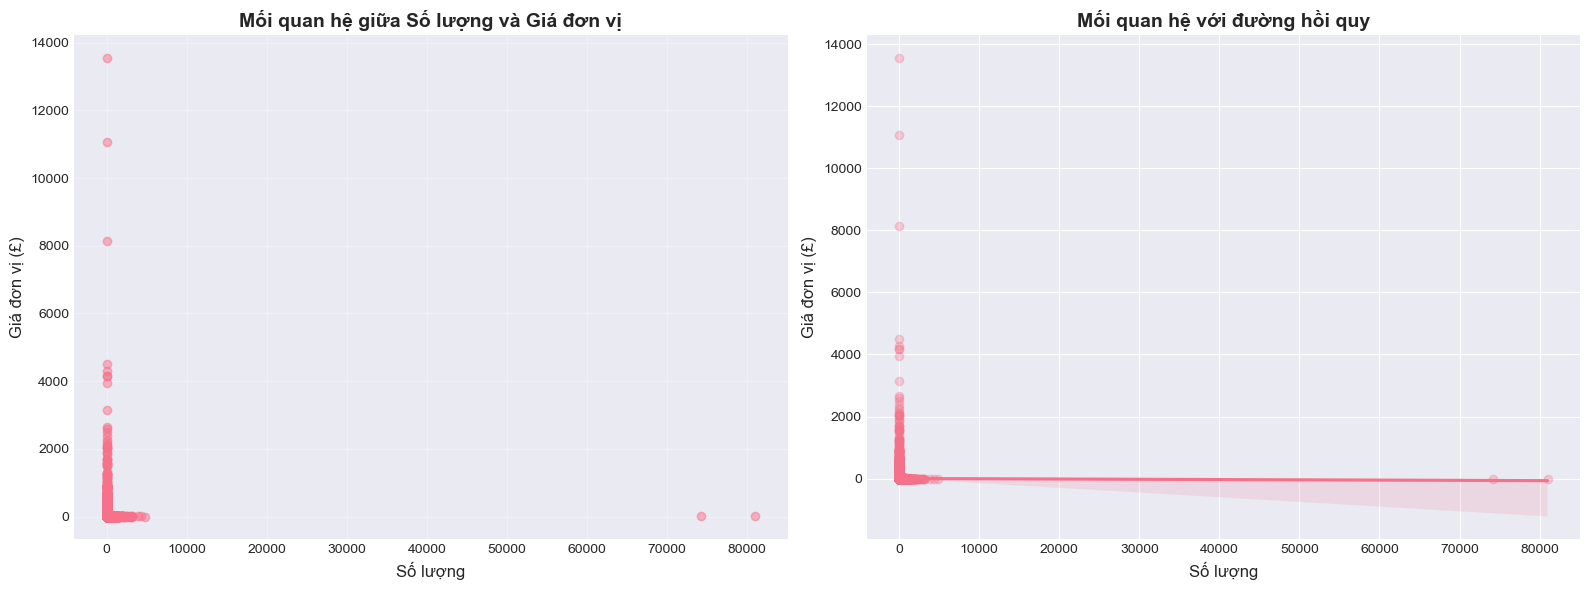

In [16]:
# Scatter plot: Quantity vs UnitPrice
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot cơ bản
axes[0].scatter(retail_clean['Quantity'], retail_clean['UnitPrice'], alpha=0.5)
axes[0].set_title('Mối quan hệ giữa Số lượng và Giá đơn vị', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Số lượng', fontsize=12)
axes[0].set_ylabel('Giá đơn vị (£)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Scatter plot với Seaborn (có regression line)
sns.regplot(data=retail_clean, x='Quantity', y='UnitPrice', 
            scatter_kws={'alpha':0.3}, ax=axes[1])
axes[1].set_title('Mối quan hệ với đường hồi quy', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Số lượng', fontsize=12)
axes[1].set_ylabel('Giá đơn vị (£)', fontsize=12)

plt.tight_layout()
plt.show()



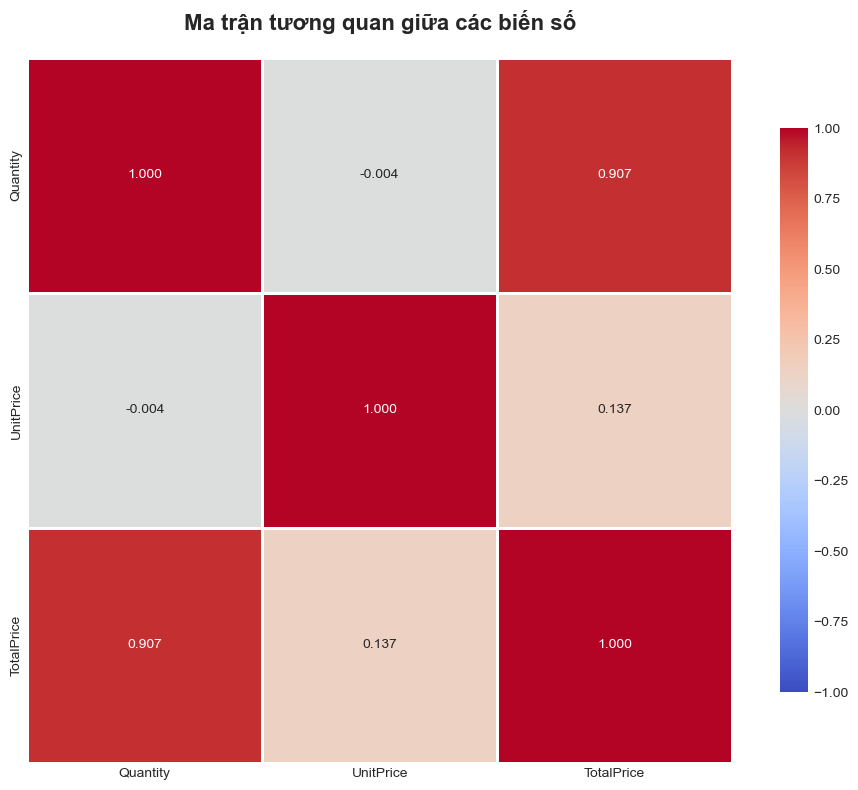


MA TRẬN TƯƠNG QUAN
            Quantity  UnitPrice  TotalPrice
Quantity    1.000000  -0.003773    0.907338
UnitPrice  -0.003773   1.000000    0.137404
TotalPrice  0.907338   0.137404    1.000000


In [27]:
# Ma trận tương quan
correlation_cols = ['Quantity', 'UnitPrice', 'TotalPrice']
correlation_matrix = retail_clean[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các biến số', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("MA TRẬN TƯƠNG QUAN")
print("=" * 80)
print(correlation_matrix)

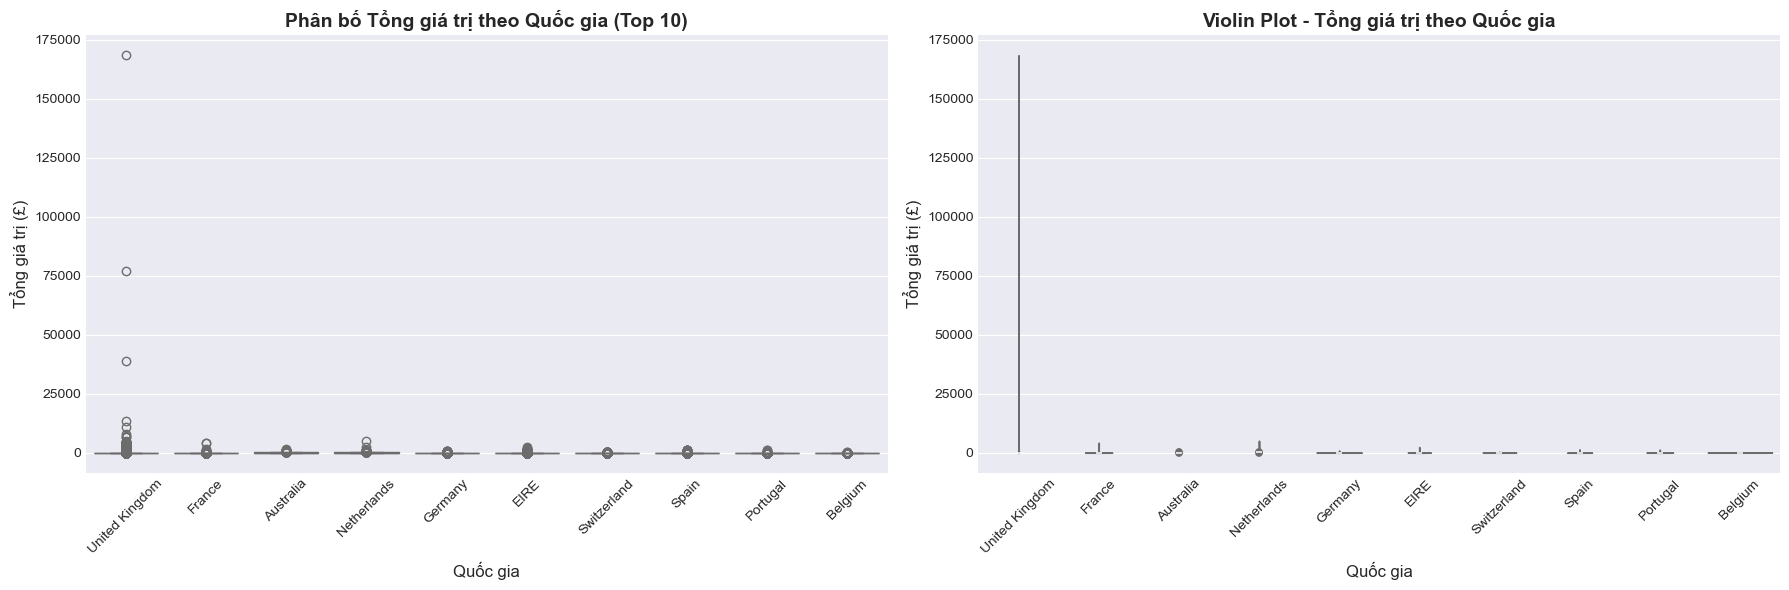

In [18]:
# Phân tích TotalPrice theo Country (Top 10)
top_10_countries = retail_clean['Country'].value_counts().head(10).index
retail_top10 = retail_clean[retail_clean['Country'].isin(top_10_countries)]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot
sns.boxplot(data=retail_top10, x='Country', y='TotalPrice', ax=axes[0])
axes[0].set_title('Phân bố Tổng giá trị theo Quốc gia (Top 10)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quốc gia', fontsize=12)
axes[0].set_ylabel('Tổng giá trị (£)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Violin plot
sns.violinplot(data=retail_top10, x='Country', y='TotalPrice', ax=axes[1])
axes[1].set_title('Violin Plot - Tổng giá trị theo Quốc gia', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Quốc gia', fontsize=12)
axes[1].set_ylabel('Tổng giá trị (£)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 7. PHÂN TÍCH THEO THỜI GIAN (TIME SERIES ANALYSIS)

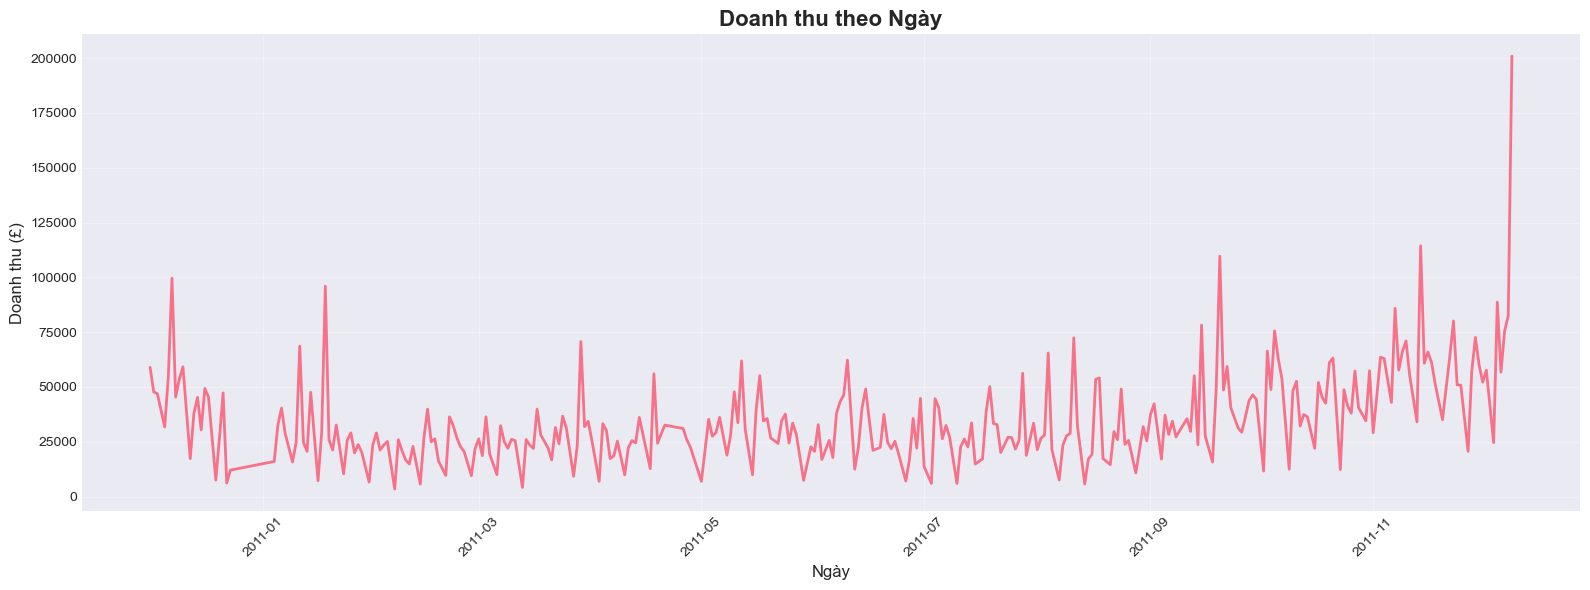

In [19]:
# Tổng doanh thu theo ngày
daily_revenue = retail_clean.groupby(retail_clean['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()
daily_revenue.columns = ['Date', 'Revenue']
daily_revenue['Date'] = pd.to_datetime(daily_revenue['Date'])

plt.figure(figsize=(16, 6))
plt.plot(daily_revenue['Date'], daily_revenue['Revenue'], linewidth=2)
plt.title('Doanh thu theo Ngày', fontsize=16, fontweight='bold')
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Doanh thu (£)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


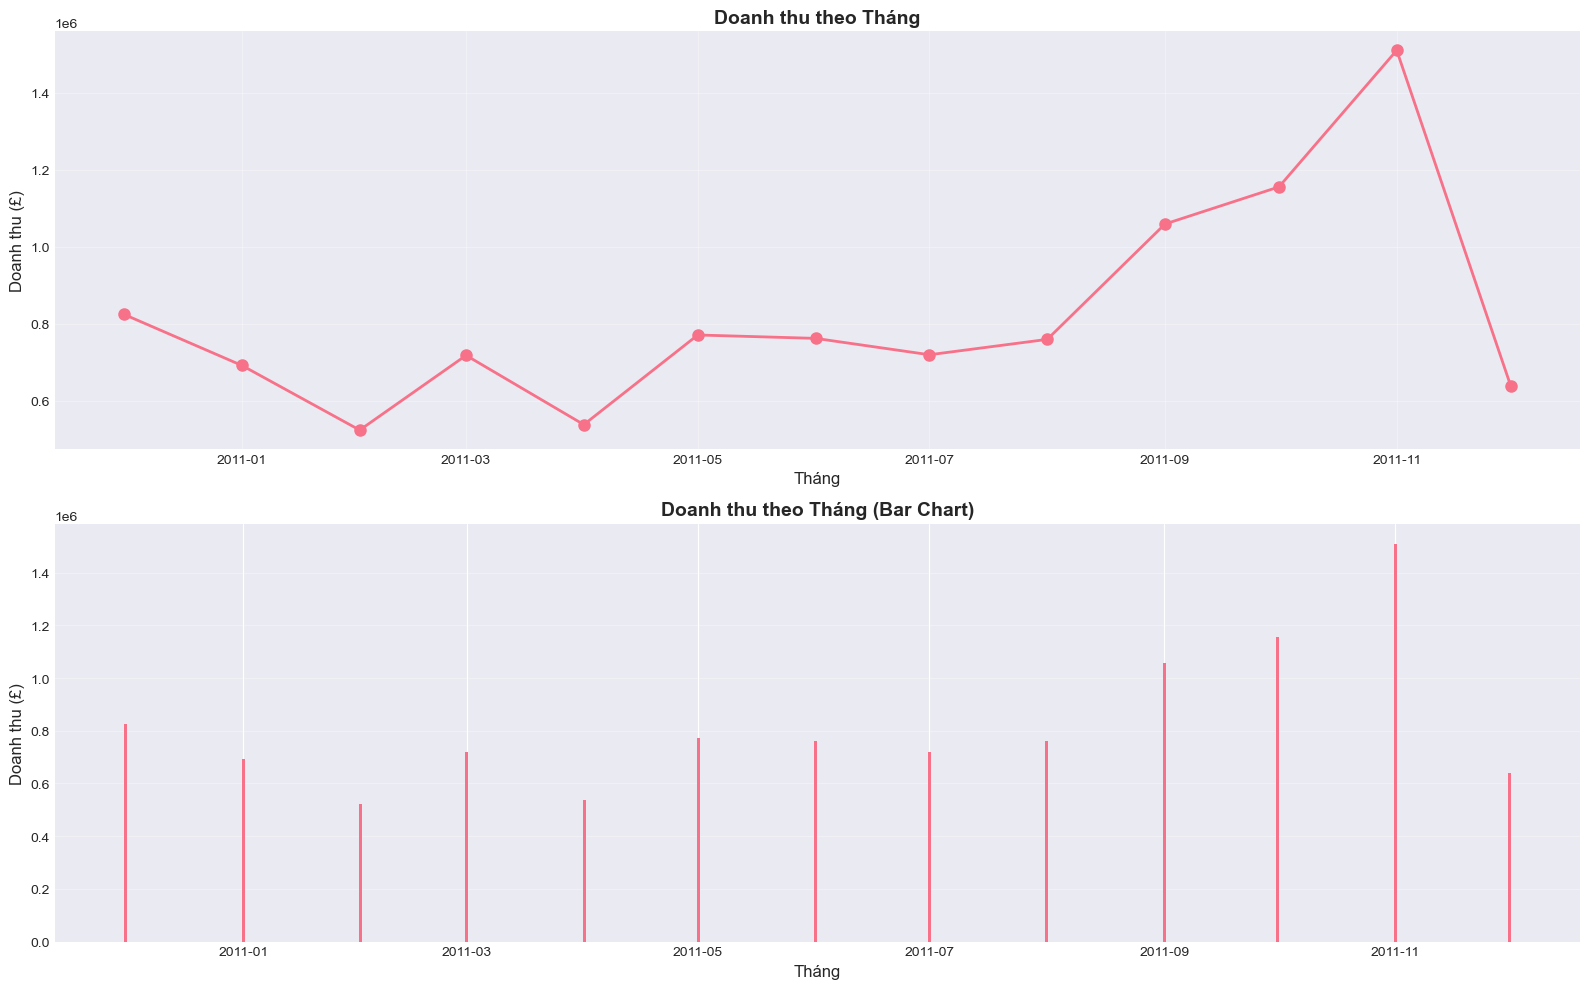

In [20]:
# Doanh thu theo tháng
monthly_revenue = retail_clean.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_revenue['YearMonth'] = pd.to_datetime(monthly_revenue[['Year', 'Month']].assign(Day=1))

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Line plot
axes[0].plot(monthly_revenue['YearMonth'], monthly_revenue['TotalPrice'], 
             marker='o', linewidth=2, markersize=8)
axes[0].set_title('Doanh thu theo Tháng', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tháng', fontsize=12)
axes[0].set_ylabel('Doanh thu (£)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Bar plot
axes[1].bar(monthly_revenue['YearMonth'], monthly_revenue['TotalPrice'])
axes[1].set_title('Doanh thu theo Tháng (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tháng', fontsize=12)
axes[1].set_ylabel('Doanh thu (£)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 8. PHÂN TÍCH KHÁCH HÀNG VÀ SẢN PHẨM

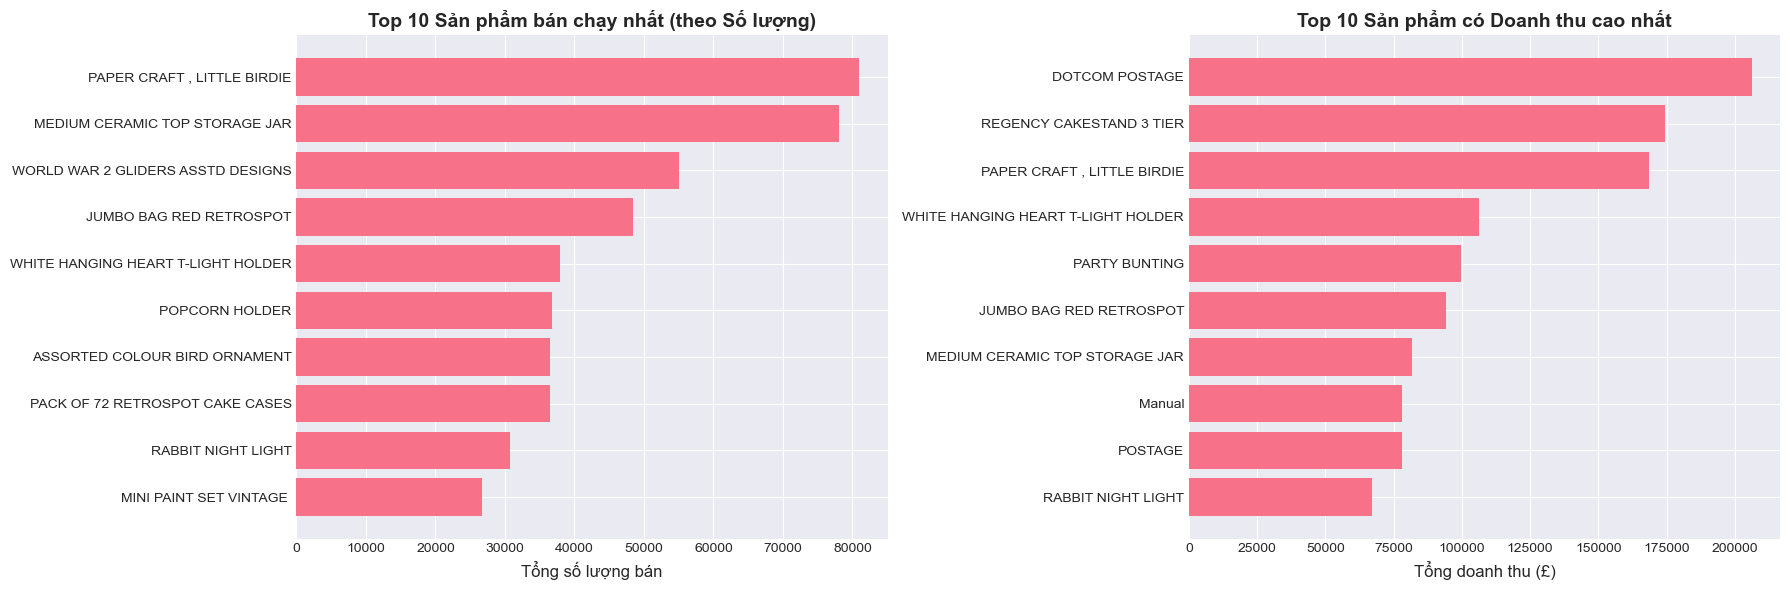

In [21]:
# Top 10 sản phẩm bán chạy nhất
top_products = retail_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).sort_values('Quantity', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10 theo số lượng
axes[0].barh(range(len(top_products)), top_products['Quantity'])
axes[0].set_yticks(range(len(top_products)))
axes[0].set_yticklabels(top_products.index, fontsize=10)
axes[0].set_title('Top 10 Sản phẩm bán chạy nhất (theo Số lượng)', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tổng số lượng bán', fontsize=12)
axes[0].invert_yaxis()

# Top 10 theo doanh thu
top_products_revenue = retail_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
axes[1].barh(range(len(top_products_revenue)), top_products_revenue.values)
axes[1].set_yticks(range(len(top_products_revenue)))
axes[1].set_yticklabels(top_products_revenue.index, fontsize=10)
axes[1].set_title('Top 10 Sản phẩm có Doanh thu cao nhất', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tổng doanh thu (£)', fontsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


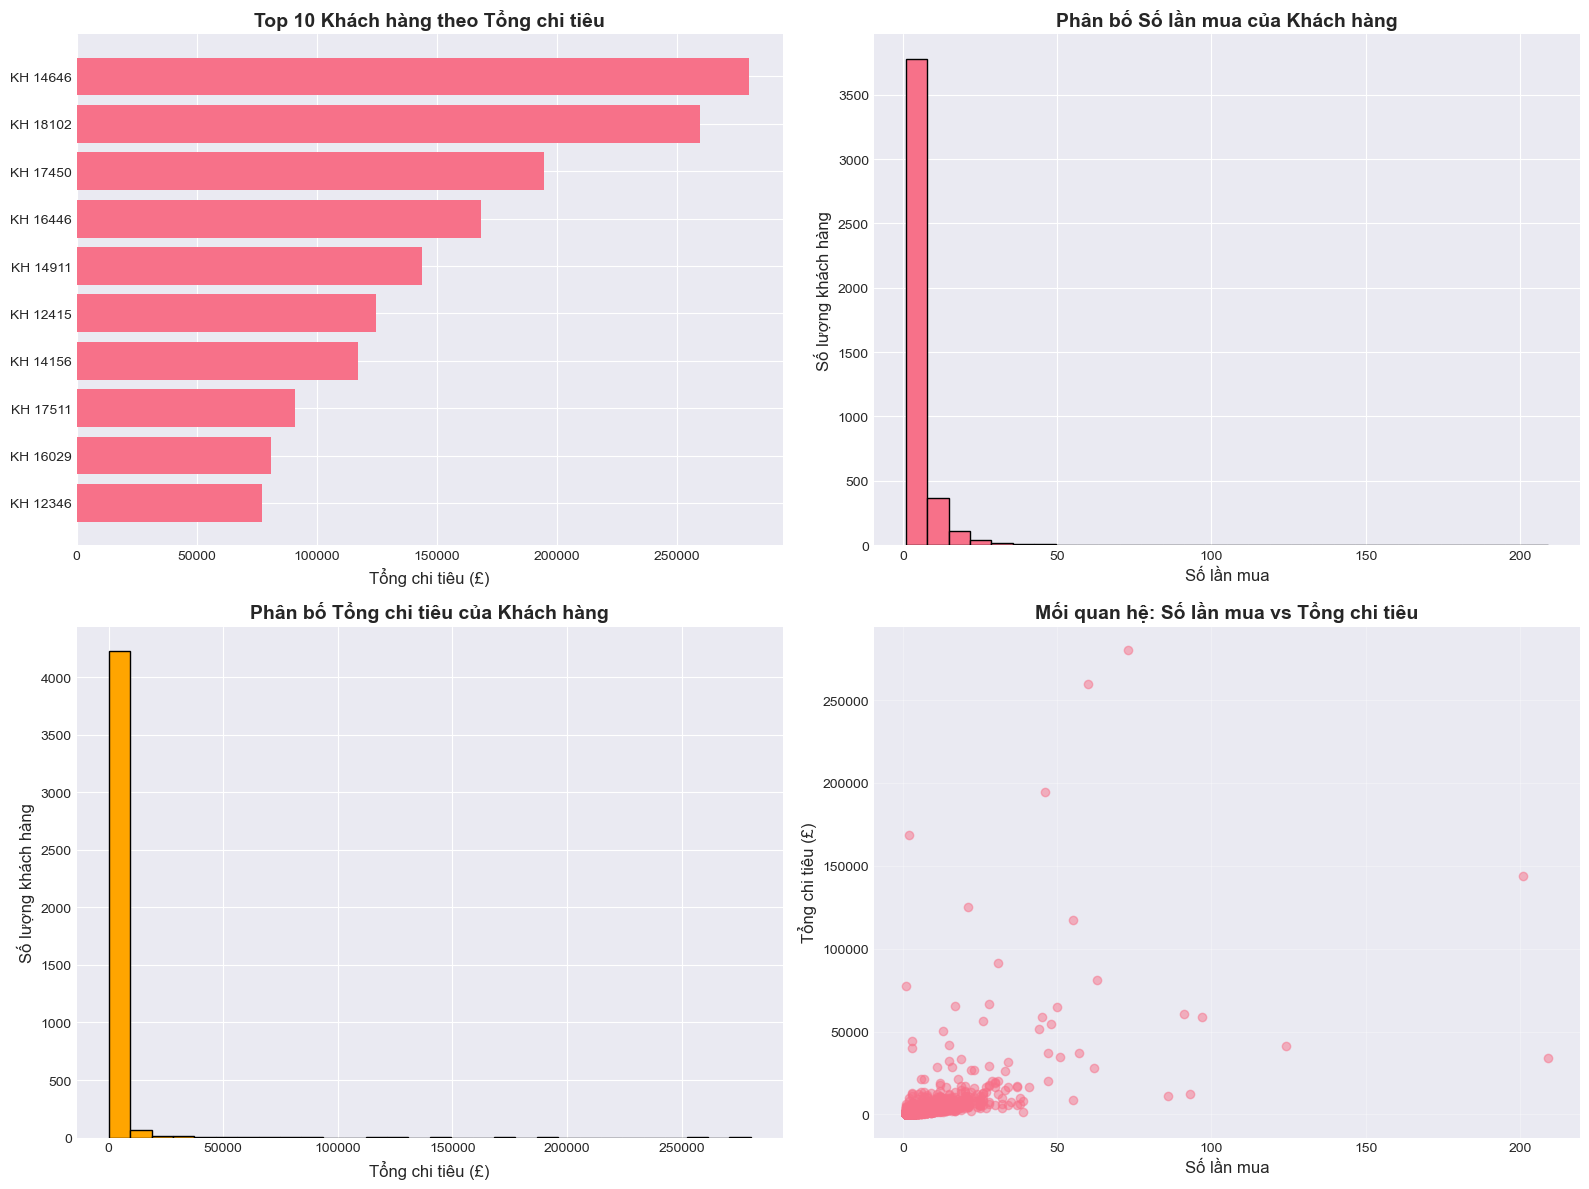


THỐNG KÊ KHÁCH HÀNG
Tổng số khách hàng: 4338
Trung bình số lần mua: 4.27
Trung bình tổng chi tiêu: £2054.27
Trung bình giá trị đơn hàng: £419.17


In [22]:
# Phân tích khách hàng (nếu có CustomerID)
if retail_clean['CustomerID'].notna().sum() > 0:
    customer_analysis = retail_clean[retail_clean['CustomerID'].notna()].groupby('CustomerID').agg({
        'InvoiceNo': 'nunique',  # Số lần mua
        'TotalPrice': 'sum',      # Tổng chi tiêu
        'Quantity': 'sum'         # Tổng số sản phẩm
    }).reset_index()
    customer_analysis.columns = ['CustomerID', 'NumPurchases', 'TotalSpent', 'TotalQuantity']
    customer_analysis['AvgOrderValue'] = customer_analysis['TotalSpent'] / customer_analysis['NumPurchases']
    
    # Top 10 khách hàng
    top_customers = customer_analysis.sort_values('TotalSpent', ascending=False).head(10)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Top 10 khách hàng theo tổng chi tiêu
    axes[0, 0].barh(range(len(top_customers)), top_customers['TotalSpent'])
    axes[0, 0].set_yticks(range(len(top_customers)))
    axes[0, 0].set_yticklabels([f'KH {int(x)}' for x in top_customers['CustomerID']])
    axes[0, 0].set_title('Top 10 Khách hàng theo Tổng chi tiêu', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Tổng chi tiêu (£)', fontsize=12)
    axes[0, 0].invert_yaxis()
    
    # Phân bố số lần mua
    axes[0, 1].hist(customer_analysis['NumPurchases'], bins=30, edgecolor='black')
    axes[0, 1].set_title('Phân bố Số lần mua của Khách hàng', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Số lần mua', fontsize=12)
    axes[0, 1].set_ylabel('Số lượng khách hàng', fontsize=12)
    
    # Phân bố tổng chi tiêu
    axes[1, 0].hist(customer_analysis['TotalSpent'], bins=30, edgecolor='black', color='orange')
    axes[1, 0].set_title('Phân bố Tổng chi tiêu của Khách hàng', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Tổng chi tiêu (£)', fontsize=12)
    axes[1, 0].set_ylabel('Số lượng khách hàng', fontsize=12)
    
    # Scatter: Số lần mua vs Tổng chi tiêu
    axes[1, 1].scatter(customer_analysis['NumPurchases'], 
                      customer_analysis['TotalSpent'], alpha=0.5)
    axes[1, 1].set_title('Mối quan hệ: Số lần mua vs Tổng chi tiêu', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Số lần mua', fontsize=12)
    axes[1, 1].set_ylabel('Tổng chi tiêu (£)', fontsize=12)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
        
    print("\n" + "=" * 80)
    print("THỐNG KÊ KHÁCH HÀNG")
    print("=" * 80)
    print(f"Tổng số khách hàng: {len(customer_analysis)}")
    print(f"Trung bình số lần mua: {customer_analysis['NumPurchases'].mean():.2f}")
    print(f"Trung bình tổng chi tiêu: £{customer_analysis['TotalSpent'].mean():.2f}")
    print(f"Trung bình giá trị đơn hàng: £{customer_analysis['AvgOrderValue'].mean():.2f}")
else:
    print("⚠ Không có dữ liệu CustomerID để phân tích")

## 9. PHÂN TÍCH THEO QUỐC GIA

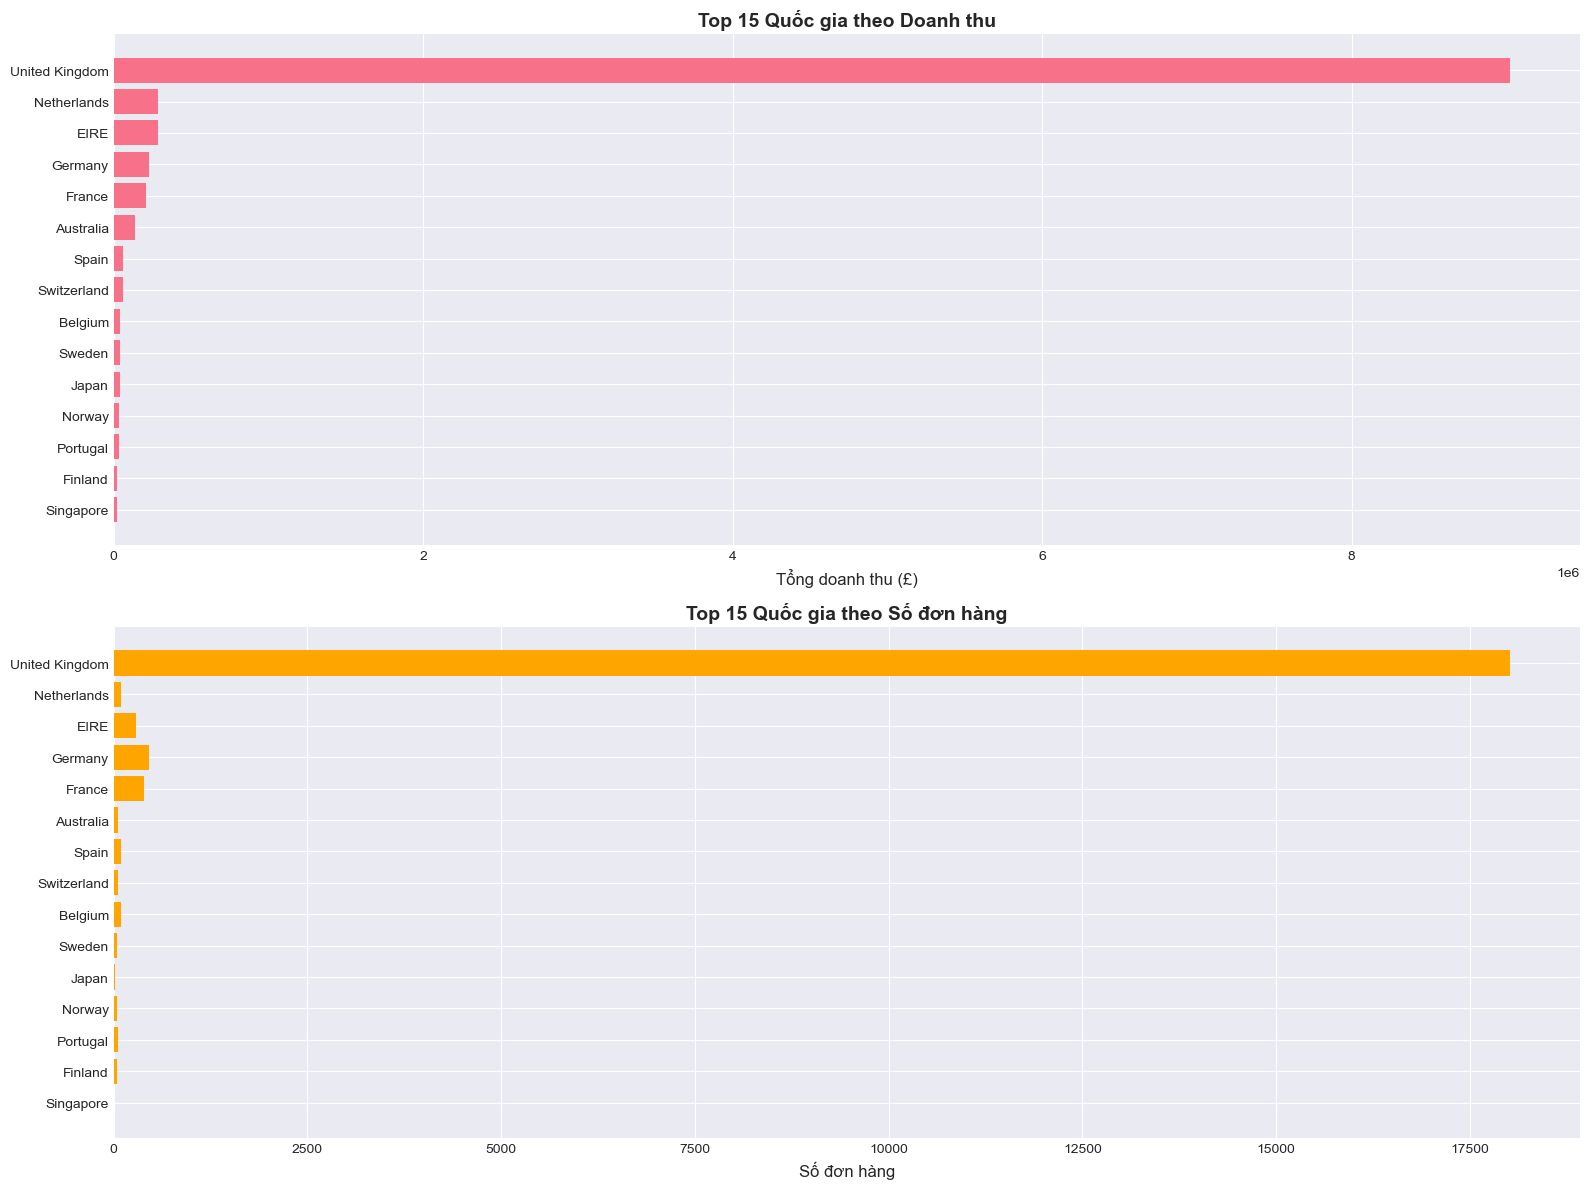

In [23]:
# Phân tích doanh thu theo quốc gia
country_analysis = retail_clean.groupby('Country').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).reset_index()
country_analysis.columns = ['Country', 'NumOrders', 'TotalRevenue', 'TotalQuantity']
country_analysis = country_analysis.sort_values('TotalRevenue', ascending=False)

# Top 15 quốc gia
top_15_countries = country_analysis.head(15)

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Doanh thu theo quốc gia
axes[0].barh(range(len(top_15_countries)), top_15_countries['TotalRevenue'])
axes[0].set_yticks(range(len(top_15_countries)))
axes[0].set_yticklabels(top_15_countries['Country'])
axes[0].set_title('Top 15 Quốc gia theo Doanh thu', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tổng doanh thu (£)', fontsize=12)
axes[0].invert_yaxis()

# Số đơn hàng theo quốc gia
axes[1].barh(range(len(top_15_countries)), top_15_countries['NumOrders'], color='orange')
axes[1].set_yticks(range(len(top_15_countries)))
axes[1].set_yticklabels(top_15_countries['Country'])
axes[1].set_title('Top 15 Quốc gia theo Số đơn hàng', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Số đơn hàng', fontsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


## 10. KẾT LUẬN VÀ INSIGHTS

In [24]:
print("=" * 80)
print("TÓM TẮT CÁC INSIGHTS CHÍNH")
print("=" * 80)

print("\n1. TỔNG QUAN DỮ LIỆU:")
print(f"   - Tổng số giao dịch: {len(retail_clean):,}")
print(f"   - Tổng doanh thu: £{retail_clean['TotalPrice'].sum():,.2f}")
print(f"   - Số sản phẩm duy nhất: {retail_clean['StockCode'].nunique():,}")
print(f"   - Số quốc gia: {retail_clean['Country'].nunique()}")

print("\n2. PHÂN BỐ DỮ LIỆU:")
print(f"   - Trung bình số lượng/giao dịch: {retail_clean['Quantity'].mean():.2f}")
print(f"   - Trung bình giá đơn vị: £{retail_clean['UnitPrice'].mean():.2f}")
print(f"   - Trung bình giá trị giao dịch: £{retail_clean['TotalPrice'].mean():.2f}")

print("\n3. THỜI GIAN:")
print(f"   - Tháng có doanh thu cao nhất: Tháng {monthly_revenue.loc[monthly_revenue['TotalPrice'].idxmax(), 'Month']}")
day_revenue = retail_clean.groupby('DayOfWeek')['TotalPrice'].sum()
print(f"   - Ngày trong tuần bán chạy nhất: {day_names[day_revenue.idxmax()]}")

print("\n4. ĐỊA LÝ:")
print(f"   - Quốc gia có doanh thu cao nhất: {country_analysis.iloc[0]['Country']}")
print(f"   - Doanh thu: £{country_analysis.iloc[0]['TotalRevenue']:,.2f}")

print("\n5. SẢN PHẨM:")
print(f"   - Sản phẩm bán chạy nhất: {top_products.index[0]}")
print(f"   - Số lượng bán: {top_products.iloc[0]['Quantity']:,.0f}")

if retail_clean['CustomerID'].notna().sum() > 0:
    print("\n6. KHÁCH HÀNG:")
    print(f"   - Tổng số khách hàng: {customer_analysis['CustomerID'].nunique():,}")
    print(f"   - Trung bình số lần mua/khách: {customer_analysis['NumPurchases'].mean():.2f}")
    print(f"   - Trung bình chi tiêu/khách: £{customer_analysis['TotalSpent'].mean():.2f}")

print("\n" + "=" * 80)
print("KHUYẾN NGHỊ:")
print("=" * 80)
print("1. Tập trung marketing vào các quốc gia có doanh thu cao")
print("2. Tăng cường quảng bá sản phẩm bán chạy")
print("3. Phân tích sâu hơn về hành vi khách hàng để cá nhân hóa")
print("4. Tối ưu hóa kho hàng dựa trên xu hướng theo thời gian")
print("5. Xem xét chiến lược giá cho các sản phẩm có giá trị cao")
print("=" * 80)

TÓM TẮT CÁC INSIGHTS CHÍNH

1. TỔNG QUAN DỮ LIỆU:
   - Tổng số giao dịch: 530,104
   - Tổng doanh thu: £10,666,684.54
   - Số sản phẩm duy nhất: 3,922
   - Số quốc gia: 38

2. PHÂN BỐ DỮ LIỆU:
   - Trung bình số lượng/giao dịch: 10.54
   - Trung bình giá đơn vị: £3.91
   - Trung bình giá trị giao dịch: £20.12

3. THỜI GIAN:
   - Tháng có doanh thu cao nhất: Tháng 11
   - Ngày trong tuần bán chạy nhất: Thứ 5

4. ĐỊA LÝ:
   - Quốc gia có doanh thu cao nhất: United Kingdom
   - Doanh thu: £9,025,222.08

5. SẢN PHẨM:
   - Sản phẩm bán chạy nhất: PAPER CRAFT , LITTLE BIRDIE
   - Số lượng bán: 80,995

6. KHÁCH HÀNG:
   - Tổng số khách hàng: 4,338
   - Trung bình số lần mua/khách: 4.27
   - Trung bình chi tiêu/khách: £2054.27

KHUYẾN NGHỊ:
1. Tập trung marketing vào các quốc gia có doanh thu cao
2. Tăng cường quảng bá sản phẩm bán chạy
3. Phân tích sâu hơn về hành vi khách hàng để cá nhân hóa
4. Tối ưu hóa kho hàng dựa trên xu hướng theo thời gian
5. Xem xét chiến lược giá cho các sản phẩm có

## 11. XUẤT BÁO CÁO

In [25]:
# Tạo báo cáo tóm tắt
summary_stats = pd.DataFrame({
    'Chỉ số': [
        'Tổng số giao dịch',
        'Tổng doanh thu (£)',
        'Số sản phẩm duy nhất',
        'Số khách hàng',
        'Số quốc gia',
        'Trung bình giá trị giao dịch (£)',
        'Trung bình số lượng/giao dịch',
        'Trung bình giá đơn vị (£)'
    ],
    'Giá trị': [
        f"{len(retail_clean):,}",
        f"{retail_clean['TotalPrice'].sum():,.2f}",
        f"{retail_clean['StockCode'].nunique():,}",
        f"{retail_clean['CustomerID'].nunique():,}" if retail_clean['CustomerID'].notna().sum() > 0 else "N/A",
        f"{retail_clean['Country'].nunique()}",
        f"{retail_clean['TotalPrice'].mean():.2f}",
        f"{retail_clean['Quantity'].mean():.2f}",
        f"{retail_clean['UnitPrice'].mean():.2f}"
    ]
})

# Lưu báo cáo
summary_stats.to_csv('online_retail_summary.csv', index=False, encoding='utf-8-sig')
print("✓ Đã lưu báo cáo tóm tắt: online_retail_summary.csv")

# Hiển thị báo cáo
print("\n" + "=" * 80)
print("BÁO CÁO TÓM TẮT")
print("=" * 80)
print(summary_stats.to_string(index=False))
print("=" * 80)

✓ Đã lưu báo cáo tóm tắt: online_retail_summary.csv

BÁO CÁO TÓM TẮT
                          Chỉ số       Giá trị
               Tổng số giao dịch       530,104
              Tổng doanh thu (£) 10,666,684.54
            Số sản phẩm duy nhất         3,922
                   Số khách hàng         4,338
                     Số quốc gia            38
Trung bình giá trị giao dịch (£)         20.12
   Trung bình số lượng/giao dịch         10.54
       Trung bình giá đơn vị (£)          3.91


---

## KẾT LUẬN

Bài thực hành này đã thực hiện phân tích khám phá dữ liệu (EDA) đầy đủ trên tập dữ liệu Online Retail, bao gồm:

### Các kỹ thuật đã sử dụng:
1. **Thống kê mô tả**: Mean, median, mode, std, variance, quartiles, IQR
2. **Xử lý dữ liệu**: Loại bỏ missing values, outliers, dữ liệu không hợp lệ
3. **Trực quan hóa**: Histogram, boxplot, violin plot, scatter plot, bar chart, line chart
4. **Phân tích đơn biến**: Phân bố của từng biến riêng lẻ
5. **Phân tích hai biến**: Mối quan hệ giữa các biến, correlation analysis
6. **Phân tích theo thời gian**: Xu hướng doanh thu theo ngày, tháng, giờ
7. **Phân tích theo nhóm**: Khách hàng, sản phẩm, quốc gia

### Insights chính:
- Xác định được các sản phẩm bán chạy và có doanh thu cao
- Phát hiện xu hướng mua sắm theo thời gian
- Nhận diện các thị trường quan trọng
- Hiểu rõ hành vi khách hàng

### Ứng dụng thực tế:
- Tối ưu hóa chiến lược marketing
- Quản lý kho hàng hiệu quả
- Cá nhân hóa trải nghiệm khách hàng
- Ra quyết định kinh doanh dựa trên dữ liệu

